In [1]:
import xarray as xr
import dask.array
import numpy as np
## plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as pcm
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.colors as col
import sys
sys.path.append('/home/Ruth.Moorman/')
### import required python functions
from masking import *
import scipy.io
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from matplotlib import rc, rcParams
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import nclcmaps

In [2]:
land_map = access_land_map()
shelf_map = access_shelf_map()
slope_map = access_slope_map()

In [3]:
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
rc('axes', labelsize=20)

## Replication of the "Observed" lines in Extended Figure 7 in Ben's paper.

He takes the mean of the zonal mean anomaly plot in the latitude dimension, so it really weights each obsevration in  latitude bands with few observations.

### direct from Ben's .mat files

In [4]:
Ben_GLODAP = xr.open_dataset('/work/Ruth.Moorman/Ben-Bronselaer_SOCCOM-GLODAP-gridded-products/GLODAP_data.nc')
Ben_SOCCOM = xr.open_dataset('/work/Ruth.Moorman/Ben-Bronselaer_SOCCOM-GLODAP-gridded-products/SOCCOM_data.nc')

In [5]:
Ben_SOCCOM_Temp = Ben_SOCCOM.Temperature
Ben_SOCCOM_Salt = Ben_SOCCOM.Salinity
Ben_SOCCOM_Oxygen = Ben_SOCCOM.Oxygen
Ben_SOCCOM_Nitrate = Ben_SOCCOM.Nitrate
Ben_SOCCOM_DIC = Ben_SOCCOM.DIC
Ben_SOCCOM_pH = Ben_SOCCOM.pH

Ben_GLODAP_Temp = Ben_GLODAP.Temperature
Ben_GLODAP_Salt = Ben_GLODAP.Salinity
Ben_GLODAP_Oxygen = Ben_GLODAP.Oxygen
Ben_GLODAP_Nitrate = Ben_GLODAP.Nitrate
Ben_GLODAP_DIC = Ben_GLODAP.DIC
Ben_GLODAP_pH = Ben_GLODAP.pH

In [6]:
def zonal_mean_overlapping(soccom, glodap, zonal_dim = 'longitude'):
    # only cells that overlap
    soccom_overlap = soccom.fillna(999999)
    glodap_overlap = glodap.fillna(999999)
    soccom_overlap = soccom_overlap.where(glodap_overlap != 999999) 
    glodap_overlap = glodap_overlap.where(soccom_overlap != 999999) 
    soccom_overlap = soccom_overlap.where(soccom_overlap != 999999)
    glodap_overlap = glodap_overlap.where(glodap_overlap != 999999)
    # zonal mean (temp)
    soccom_zonal = soccom_overlap.mean(dim = zonal_dim)
    glodap_zonal = glodap_overlap.mean(dim = zonal_dim)
    # anomaly
    anomaly_zonal = soccom_zonal - glodap_zonal
    return anomaly_zonal, soccom_zonal, glodap_zonal

In [7]:
Ben_anomaly_Temp_zonal, Ben_SOCCOM_Temp_zonal, Ben_GLODAP_Temp_zonal = zonal_mean_overlapping(Ben_SOCCOM_Temp,Ben_GLODAP_Temp)
Ben_anomaly_Salt_zonal, Ben_SOCCOM_Salt_zonal, Ben_GLODAP_Salt_zonal = zonal_mean_overlapping(Ben_SOCCOM_Salt,Ben_GLODAP_Salt)
Ben_anomaly_Oxygen_zonal, Ben_SOCCOM_Oxygen_zonal, Ben_GLODAP_Oxygen_zonal = zonal_mean_overlapping(Ben_SOCCOM_Oxygen,Ben_GLODAP_Oxygen)
Ben_anomaly_Nitrate_zonal, Ben_SOCCOM_Nitrate_zonal, Ben_GLODAP_Nitrate_zonal = zonal_mean_overlapping(Ben_SOCCOM_Nitrate,Ben_GLODAP_Nitrate)
Ben_anomaly_DIC_zonal, Ben_SOCCOM_DIC_zonal, Ben_GLODAP_DIC_zonal = zonal_mean_overlapping(Ben_SOCCOM_DIC,Ben_GLODAP_DIC)
Ben_anomaly_pH_zonal, Ben_SOCCOM_pH_zonal, Ben_GLODAP_pH_zonal = zonal_mean_overlapping(Ben_SOCCOM_pH,Ben_GLODAP_pH)

In [19]:
Ben_anomaly_Temp_vert60 = Ben_anomaly_Temp_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ben_anomaly_Salt_vert60 = Ben_anomaly_Salt_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ben_anomaly_Oxygen_vert60 = Ben_anomaly_Oxygen_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ben_anomaly_Nitrate_vert60 = Ben_anomaly_Nitrate_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ben_anomaly_DIC_vert60 = Ben_anomaly_DIC_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ben_anomaly_pH_vert60 = Ben_anomaly_pH_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')

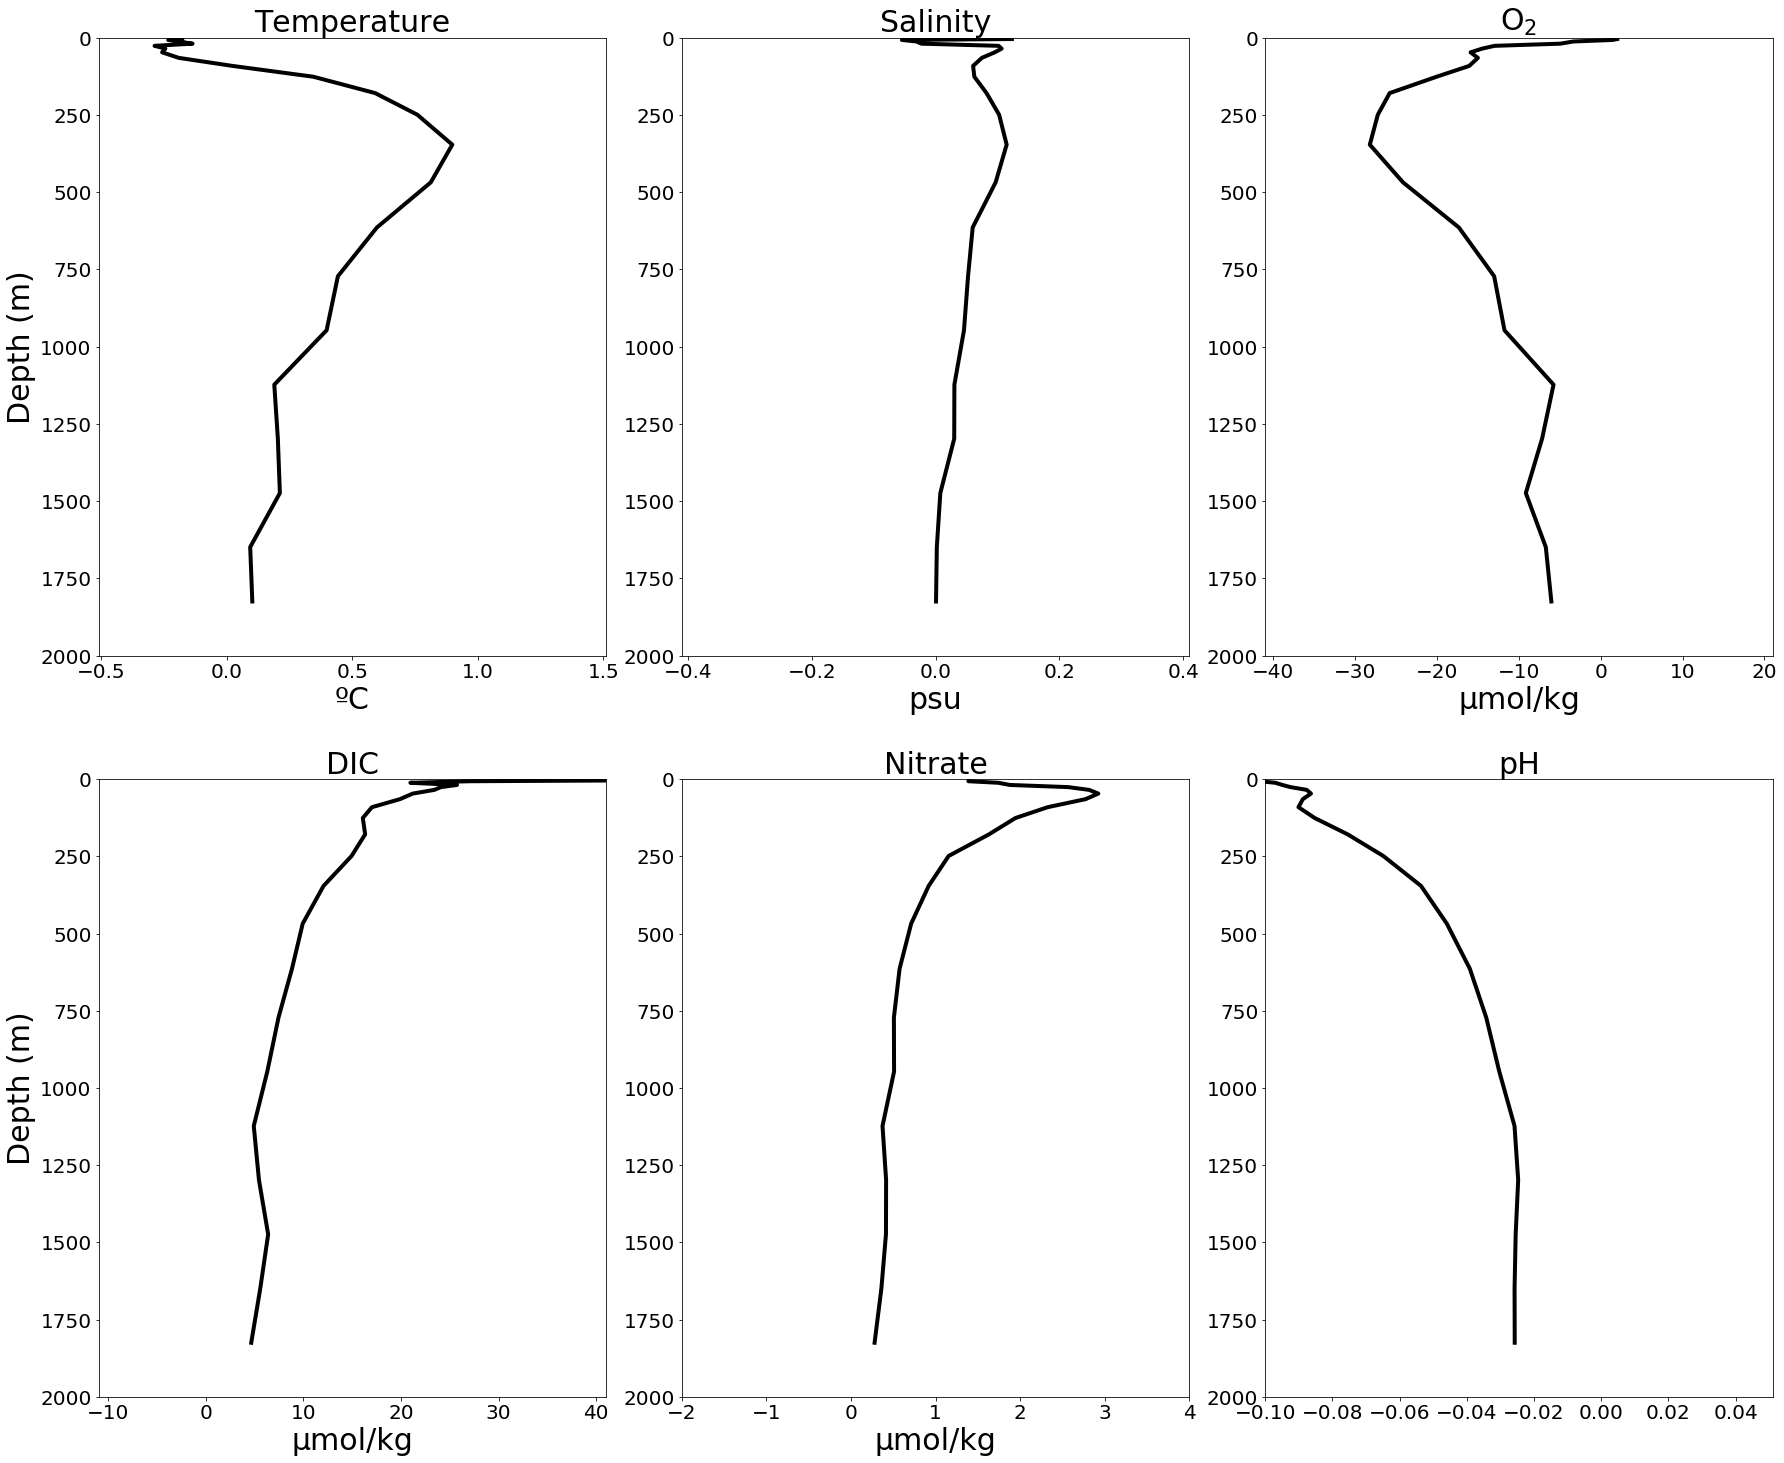

In [41]:
fig = plt.figure(figsize=[30, 25])
gs = gridspec.GridSpec(2,3)
ax, ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[1,0]),plt.subplot(gs[1,1]), plt.subplot(gs[1,2])
gs.update(hspace = 0.2, wspace = 0.15)

ax.plot(Ben_anomaly_Temp_vert60.values, Ben_anomaly_Temp_vert60.depth, 'k', linewidth = 4)
ax.set_ylim([2000,0])
ax.set_xlim([-0.51,1.51])
ax.set_title('Temperature', fontsize = 30)
ax.set_ylabel('Depth (m)', fontsize = 30)
ax.set_xlabel('ºC', fontsize = 30)
ax1.plot(Ben_anomaly_Salt_vert60.values, Ben_anomaly_Salt_vert60.depth, 'k', linewidth = 4)
ax1.set_ylim([2000,0])
ax1.set_xlim([-0.41,0.41])
ax1.set_xlabel('psu', fontsize = 30)
ax1.set_title('Salinity', fontsize = 30)

ax2.plot(Ben_anomaly_Oxygen_vert60.values, Ben_anomaly_Oxygen_vert60.depth, 'k', linewidth = 4)
ax2.set_ylim([2000,0])
ax2.set_xlim([-41,21])
ax2.set_xlabel('µmol/kg', fontsize = 30)
ax2.set_title('O$_2$', fontsize = 30)

ax3.plot(Ben_anomaly_DIC_vert60.values, Ben_anomaly_DIC_vert60.depth, 'k', linewidth = 4)
ax3.set_ylim([2000,0])
ax3.set_xlim([-11,41])
ax3.set_ylabel('Depth (m)', fontsize = 30)
ax3.set_xlabel('µmol/kg', fontsize = 30)
ax3.set_title('DIC', fontsize = 30)

ax4.plot(Ben_anomaly_Nitrate_vert60.values, Ben_anomaly_Nitrate_vert60.depth, 'k', linewidth = 4)
ax4.set_ylim([2000,0])
ax4.set_xlim([-2,4])
ax4.set_xlabel('µmol/kg', fontsize = 30)
ax4.set_title('Nitrate', fontsize = 30)

ax5.plot(Ben_anomaly_pH_vert60.values, Ben_anomaly_pH_vert60.depth, 'k', linewidth = 4)
ax5.set_ylim([2000,0])
ax5.set_xlim([-0.1,0.051])
ax5.set_title('pH', fontsize = 30)


# figurepath = 'F1_F2-original.png'
# plt.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format='png',transparent=False, bbox_inches='tight', pad_inches=0.1,frameon=None)

plt.show()

### reproduction (no bathymetry masking)

In [42]:
float_dir = '/work/Ruth.Moorman/SOCCOM-floats/LR_SOCCOM_20200308/processed_SOCCOM/'
ds = xr.open_dataset(float_dir+'SOCCOM_ALL_FLOAT-bronselaer-gridded-climatology.nc')
#temp
soccom_temp_linear_grid = ds.temp_linear.mean(dim = 'month')
soccom_temp_nearest_grid = ds.temp_nearest.mean(dim = 'month')
soccom_temp_cubic_grid = ds.temp_cubic.mean(dim = 'month')
soccom_temp_quad_grid = ds.temp_quad.mean(dim = 'month')
soccom_temp_grid = (soccom_temp_linear_grid+ soccom_temp_nearest_grid+ soccom_temp_cubic_grid+ soccom_temp_quad_grid)/4
soccom_temp_profile_count = ds.temp_profile_count
#salt
soccom_salt_linear_grid = ds.salt_linear.mean(dim = 'month')
soccom_salt_nearest_grid = ds.salt_nearest.mean(dim = 'month')
soccom_salt_cubic_grid = ds.salt_cubic.mean(dim = 'month')
soccom_salt_quad_grid = ds.salt_quad.mean(dim = 'month')
soccom_salt_grid = (soccom_salt_linear_grid+ soccom_salt_nearest_grid+ soccom_salt_cubic_grid+ soccom_salt_quad_grid)/4
soccom_salt_profile_count = ds.salt_profile_count
#nitrate
soccom_nitrate_linear_grid = ds.nitrate_linear.mean(dim = 'month')
soccom_nitrate_nearest_grid = ds.nitrate_nearest.mean(dim = 'month')
soccom_nitrate_cubic_grid = ds.nitrate_cubic.mean(dim = 'month')
soccom_nitrate_quad_grid = ds.nitrate_quad.mean(dim = 'month')
soccom_nitrate_grid = (soccom_nitrate_linear_grid+ soccom_nitrate_nearest_grid+ soccom_nitrate_cubic_grid+ soccom_nitrate_quad_grid)/4
soccom_nitrate_profile_count = ds.nitrate_profile_count
#oxygen
soccom_oxygen_linear_grid = ds.oxygen_linear.mean(dim = 'month')
soccom_oxygen_nearest_grid = ds.oxygen_nearest.mean(dim = 'month')
soccom_oxygen_cubic_grid = ds.oxygen_cubic.mean(dim = 'month')
soccom_oxygen_quad_grid = ds.oxygen_quad.mean(dim = 'month')
soccom_oxygen_grid = (soccom_oxygen_linear_grid+ soccom_oxygen_nearest_grid+ soccom_oxygen_cubic_grid+ soccom_oxygen_quad_grid)/4
soccom_oxygen_profile_count = ds.oxygen_profile_count
#dic
soccom_dic_linear_grid = ds.dic_linear.mean(dim = 'month')
soccom_dic_nearest_grid = ds.dic_nearest.mean(dim = 'month')
soccom_dic_cubic_grid = ds.dic_cubic.mean(dim = 'month')
soccom_dic_quad_grid = ds.dic_quad.mean(dim = 'month')
soccom_dic_grid = (soccom_dic_linear_grid+ soccom_dic_nearest_grid+ soccom_dic_cubic_grid+ soccom_dic_quad_grid)/4
soccom_dic_profile_count = ds.dic_profile_count
#sigma0
soccom_sigma_linear_grid = ds.sigma_linear.mean(dim = 'month')
soccom_sigma_nearest_grid = ds.sigma_nearest.mean(dim = 'month')
soccom_sigma_cubic_grid = ds.sigma_cubic.mean(dim = 'month')
soccom_sigma_quad_grid = ds.sigma_quad.mean(dim = 'month')
soccom_sigma_grid = (soccom_sigma_linear_grid+ soccom_sigma_nearest_grid+ soccom_sigma_cubic_grid+ soccom_sigma_quad_grid)/4
soccom_sigma_profile_count = ds.sigma_profile_count

In [43]:
float_dir = '/work/Ruth.Moorman/GLODAP/processed_GLODAP/'
ds = xr.open_dataset(float_dir+'GLODAP-bronselaer-gridded-climatology.nc')
#temp
glodap_temp_linear_grid = ds.temp_linear
glodap_temp_nearest_grid = ds.temp_nearest
glodap_temp_cubic_grid = ds.temp_cubic
glodap_temp_quad_grid = ds.temp_quad
glodap_temp_grid = (glodap_temp_linear_grid+glodap_temp_nearest_grid+glodap_temp_cubic_grid+glodap_temp_quad_grid)/4
#salt
glodap_salt_linear_grid = ds.salt_linear
glodap_salt_nearest_grid = ds.salt_nearest
glodap_salt_cubic_grid = ds.salt_cubic
glodap_salt_quad_grid = ds.salt_quad
glodap_salt_grid = (glodap_salt_linear_grid+glodap_salt_nearest_grid+glodap_salt_cubic_grid+glodap_salt_quad_grid)/4
#oxygen
glodap_oxyg_linear_grid = ds.oxygen_linear
glodap_oxyg_nearest_grid = ds.oxygen_nearest
glodap_oxyg_cubic_grid = ds.oxygen_cubic
glodap_oxyg_quad_grid = ds.oxygen_quad
glodap_oxyg_grid = (glodap_oxyg_linear_grid+glodap_oxyg_nearest_grid+glodap_oxyg_cubic_grid+glodap_oxyg_quad_grid)/4
#nitrate
glodap_nitr_linear_grid = ds.nitrate_linear
glodap_nitr_nearest_grid = ds.nitrate_nearest
glodap_nitr_cubic_grid = ds.nitrate_cubic
glodap_nitr_quad_grid = ds.nitrate_quad
glodap_nitr_grid = (glodap_nitr_linear_grid+glodap_nitr_nearest_grid+glodap_nitr_cubic_grid+glodap_nitr_quad_grid)/4
#dic
glodap_dic_linear_grid = ds.dic_linear
glodap_dic_nearest_grid = ds.dic_nearest
glodap_dic_cubic_grid = ds.dic_cubic
glodap_dic_quad_grid = ds.dic_quad
glodap_dic_grid = (glodap_dic_linear_grid+glodap_dic_nearest_grid+glodap_dic_cubic_grid+glodap_dic_quad_grid)/4

glodap_sigma_linear_grid = ds.sigma_linear
glodap_sigma_nearest_grid = ds.sigma_nearest
glodap_sigma_cubic_grid = ds.sigma_cubic
glodap_sigma_quad_grid = ds.sigma_quad
glodap_sigma_grid = (glodap_sigma_linear_grid+glodap_sigma_nearest_grid+glodap_sigma_cubic_grid+glodap_sigma_quad_grid)/4

In [44]:
Ruth_anomaly_Temp_zonal, Ruth_SOCCOM_Temp_zonal, Ruth_GLODAP_Temp_zonal = zonal_mean_overlapping(soccom_temp_grid,glodap_temp_grid)
Ruth_anomaly_Salt_zonal, Ruth_SOCCOM_Salt_zonal, Ruth_GLODAP_Salt_zonal = zonal_mean_overlapping(soccom_salt_grid,glodap_salt_grid)
Ruth_anomaly_Oxygen_zonal, Ruth_SOCCOM_Oxygen_zonal, Ruth_GLODAP_Oxygen_zonal = zonal_mean_overlapping(soccom_oxygen_grid,glodap_oxyg_grid)
Ruth_anomaly_Nitrate_zonal, Ruth_SOCCOM_Nitrate_zonal, Ruth_GLODAP_Nitrate_zonal = zonal_mean_overlapping(soccom_nitrate_grid,glodap_nitr_grid)
Ruth_anomaly_DIC_zonal, Ruth_SOCCOM_DIC_zonal, Ruth_GLODAP_DIC_zonal = zonal_mean_overlapping(soccom_dic_grid,glodap_dic_grid)
Ruth_anomaly_Sigma_zonal, Ruth_SOCCOM_Sigma_zonal, Ruth_GLODAP_Sigma_zonal = zonal_mean_overlapping(soccom_sigma_grid,glodap_sigma_grid)

In [59]:
float_dir = '/work/Ruth.Moorman/SOCCOM-floats/LR_SOCCOM_20200308/processed_SOCCOM/'
ds = xr.open_dataset(float_dir+'SOCCOM_ALL_FLOAT-bronselaer-gridded-climatology.nc')
#temp
soccom_temp_linear_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).temp_linear.mean(dim = 'month')
soccom_temp_nearest_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).temp_nearest.mean(dim = 'month')
soccom_temp_cubic_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).temp_cubic.mean(dim = 'month')
soccom_temp_quad_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).temp_quad.mean(dim = 'month')
soccom_temp_grid_DJFMAM = (soccom_temp_linear_grid_DJFMAM+ soccom_temp_nearest_grid_DJFMAM+ soccom_temp_cubic_grid_DJFMAM+ soccom_temp_quad_grid_DJFMAM)/4
#salt
soccom_salt_linear_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).salt_linear.mean(dim = 'month')
soccom_salt_nearest_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).salt_nearest.mean(dim = 'month')
soccom_salt_cubic_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).salt_cubic.mean(dim = 'month')
soccom_salt_quad_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).salt_quad.mean(dim = 'month')
soccom_salt_grid_DJFMAM = (soccom_salt_linear_grid_DJFMAM+ soccom_salt_nearest_grid_DJFMAM+ soccom_salt_cubic_grid_DJFMAM+ soccom_salt_quad_grid_DJFMAM)/4
#nitrate
soccom_nitrate_linear_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).nitrate_linear.mean(dim = 'month')
soccom_nitrate_nearest_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).nitrate_nearest.mean(dim = 'month')
soccom_nitrate_cubic_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).nitrate_cubic.mean(dim = 'month')
soccom_nitrate_quad_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).nitrate_quad.mean(dim = 'month')
soccom_nitrate_grid_DJFMAM = (soccom_nitrate_linear_grid_DJFMAM+ soccom_nitrate_nearest_grid_DJFMAM+ soccom_nitrate_cubic_grid_DJFMAM+ soccom_nitrate_quad_grid_DJFMAM)/4
#oxygen
soccom_oxygen_linear_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).oxygen_linear.mean(dim = 'month')
soccom_oxygen_nearest_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).oxygen_nearest.mean(dim = 'month')
soccom_oxygen_cubic_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).oxygen_cubic.mean(dim = 'month')
soccom_oxygen_quad_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).oxygen_quad.mean(dim = 'month')
soccom_oxygen_grid_DJFMAM = (soccom_oxygen_linear_grid_DJFMAM+ soccom_oxygen_nearest_grid_DJFMAM+ soccom_oxygen_cubic_grid_DJFMAM+ soccom_oxygen_quad_grid_DJFMAM)/4
#dic
soccom_dic_linear_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).dic_linear.mean(dim = 'month')
soccom_dic_nearest_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).dic_nearest.mean(dim = 'month')
soccom_dic_cubic_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).dic_cubic.mean(dim = 'month')
soccom_dic_quad_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).dic_quad.mean(dim = 'month')
soccom_dic_grid_DJFMAM = (soccom_dic_linear_grid_DJFMAM+ soccom_dic_nearest_grid_DJFMAM+ soccom_dic_cubic_grid_DJFMAM+ soccom_dic_quad_grid_DJFMAM)/4
#sigma0
soccom_sigma_linear_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).sigma_linear.mean(dim = 'month')
soccom_sigma_nearest_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).sigma_nearest.mean(dim = 'month')
soccom_sigma_cubic_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).sigma_cubic.mean(dim = 'month')
soccom_sigma_quad_grid_DJFMAM = ds.sel(month = [12,1,2,3,4,5]).sigma_quad.mean(dim = 'month')
soccom_sigma_grid_DJFMAM = (soccom_sigma_linear_grid_DJFMAM+ soccom_sigma_nearest_grid_DJFMAM+ soccom_sigma_cubic_grid_DJFMAM+ soccom_sigma_quad_grid_DJFMAM)/4

In [60]:
_ , Ruth_SOCCOM_Temp_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_temp_grid_DJFMAM,glodap_temp_grid)
_ , Ruth_SOCCOM_Salt_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_salt_grid_DJFMAM,glodap_salt_grid)
_ , Ruth_SOCCOM_Oxygen_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_oxygen_grid_DJFMAM,glodap_oxyg_grid)
_ , Ruth_SOCCOM_Nitrate_zonal_DJFMAM,_  = zonal_mean_overlapping(soccom_nitrate_grid_DJFMAM,glodap_nitr_grid)
_ , Ruth_SOCCOM_DIC_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_dic_grid_DJFMAM,glodap_dic_grid)
_ , Ruth_SOCCOM_Sigma_zonal_DJFMAM,  _= zonal_mean_overlapping(soccom_sigma_grid_DJFMAM,glodap_sigma_grid)

In [61]:
Ruth_SOCCOM_Temp_zonal_summer_bias = Ruth_SOCCOM_Temp_zonal_DJFMAM - Ruth_SOCCOM_Temp_zonal
Ruth_SOCCOM_Salt_zonal_summer_bias  = Ruth_SOCCOM_Salt_zonal_DJFMAM - Ruth_SOCCOM_Salt_zonal
Ruth_SOCCOM_Oxygen_zonal_summer_bias  = Ruth_SOCCOM_Oxygen_zonal_DJFMAM - Ruth_SOCCOM_Oxygen_zonal
Ruth_SOCCOM_Nitrate_zonal_summer_bias  = Ruth_SOCCOM_Nitrate_zonal_DJFMAM - Ruth_SOCCOM_Nitrate_zonal
Ruth_SOCCOM_DIC_zonal_summer_bias  = Ruth_SOCCOM_DIC_zonal_DJFMAM - Ruth_SOCCOM_DIC_zonal
Ruth_SOCCOM_Sigma_zonal_summer_bias  = Ruth_SOCCOM_Sigma_zonal_DJFMAM - Ruth_SOCCOM_Sigma_zonal

In [62]:
# glodap seasonal bias correction
Ruth_GLODAP_Temp_zonal_BC = Ruth_GLODAP_Temp_zonal - Ruth_SOCCOM_Temp_zonal_summer_bias
Ruth_GLODAP_Salt_zonal_BC = Ruth_GLODAP_Salt_zonal - Ruth_SOCCOM_Salt_zonal_summer_bias
Ruth_GLODAP_Oxygen_zonal_BC = Ruth_GLODAP_Oxygen_zonal - Ruth_SOCCOM_Oxygen_zonal_summer_bias
Ruth_GLODAP_Nitrate_zonal_BC = Ruth_GLODAP_Nitrate_zonal - Ruth_SOCCOM_Nitrate_zonal_summer_bias
Ruth_GLODAP_DIC_zonal_BC = Ruth_GLODAP_DIC_zonal - Ruth_SOCCOM_DIC_zonal_summer_bias
Ruth_GLODAP_Sigma_zonal_BC = Ruth_GLODAP_Sigma_zonal - Ruth_SOCCOM_Sigma_zonal_summer_bias

In [63]:
Ruth_anomaly_Temp_zonal_BC = Ruth_SOCCOM_Temp_zonal - Ruth_GLODAP_Temp_zonal_BC
Ruth_anomaly_Salt_zonal_BC = Ruth_SOCCOM_Salt_zonal - Ruth_GLODAP_Salt_zonal_BC
Ruth_anomaly_Oxygen_zonal_BC = Ruth_SOCCOM_Oxygen_zonal - Ruth_GLODAP_Oxygen_zonal_BC
Ruth_anomaly_Nitrate_zonal_BC = Ruth_SOCCOM_Nitrate_zonal - Ruth_GLODAP_Nitrate_zonal_BC
Ruth_anomaly_DIC_zonal_BC = Ruth_SOCCOM_DIC_zonal - Ruth_GLODAP_DIC_zonal_BC
Ruth_anomaly_Sigma_zonal_BC = Ruth_SOCCOM_Sigma_zonal - Ruth_GLODAP_Sigma_zonal_BC

In [66]:
Ruth_anomaly_Temp_vert60_BC = Ruth_anomaly_Temp_zonal_BC.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Salt_vert60_BC = Ruth_anomaly_Salt_zonal_BC.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Oxygen_vert60_BC = Ruth_anomaly_Oxygen_zonal_BC.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Nitrate_vert60_BC = Ruth_anomaly_Nitrate_zonal_BC.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_DIC_vert60_BC = Ruth_anomaly_DIC_zonal_BC.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')

In [67]:
Ruth_anomaly_Temp_vert60 = Ruth_anomaly_Temp_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Salt_vert60 = Ruth_anomaly_Salt_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Oxygen_vert60 = Ruth_anomaly_Oxygen_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Nitrate_vert60 = Ruth_anomaly_Nitrate_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_DIC_vert60 = Ruth_anomaly_DIC_zonal.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')

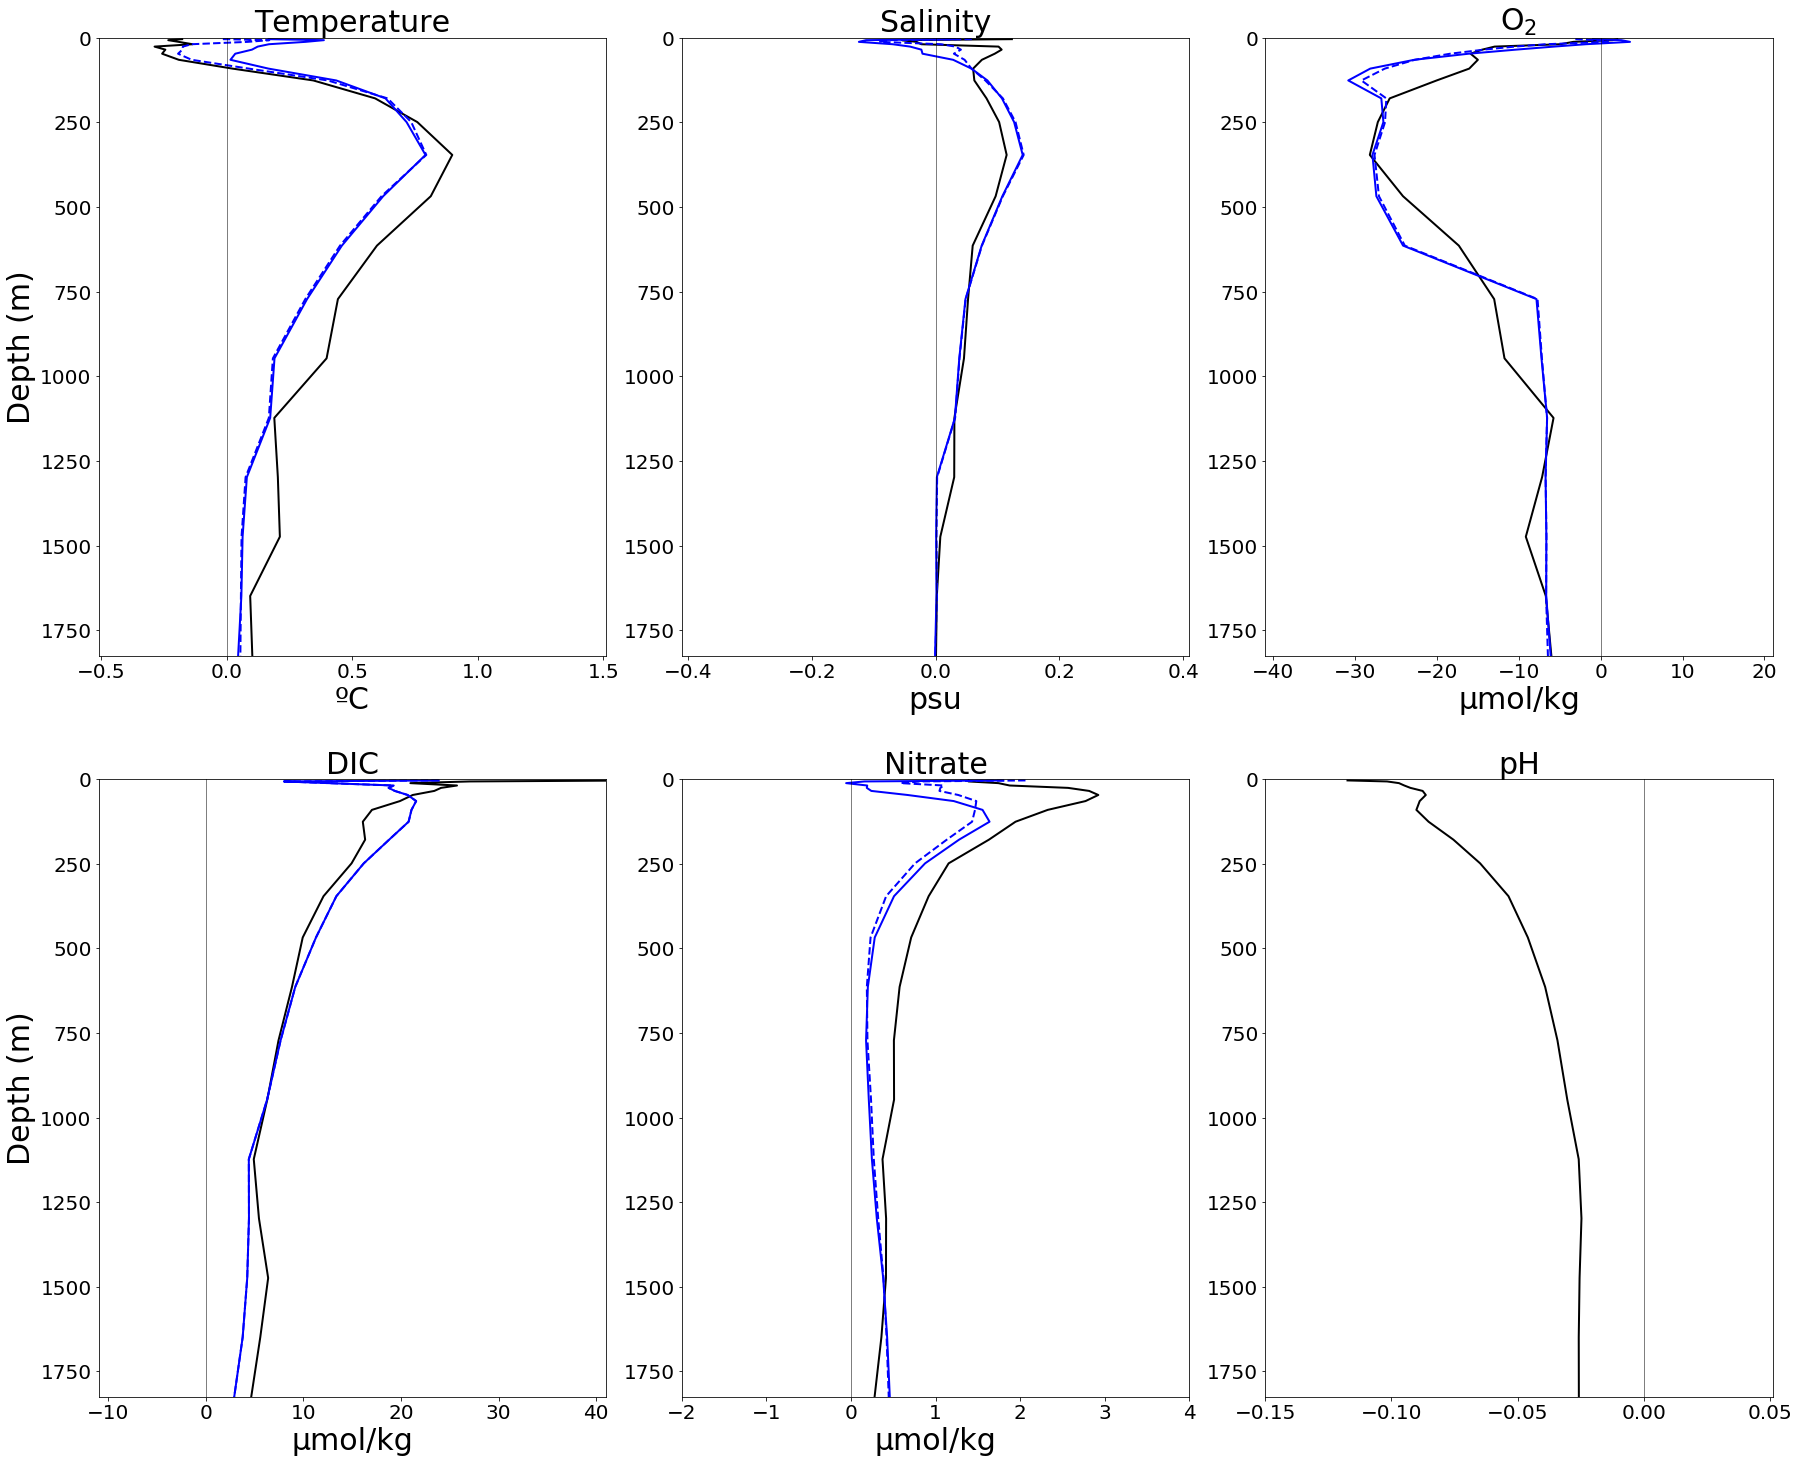

In [69]:
fig = plt.figure(figsize=[30, 25])
gs = gridspec.GridSpec(2,3)
ax, ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[1,0]),plt.subplot(gs[1,1]), plt.subplot(gs[1,2])
gs.update(hspace = 0.2, wspace = 0.15)

ax.plot(Ben_anomaly_Temp_vert60.values, Ben_anomaly_Temp_vert60.depth, 'k', linewidth = 2)
ax.plot(Ruth_anomaly_Temp_vert60.values, Ruth_anomaly_Temp_vert60.depth, 'b--', linewidth = 2)
ax.plot(Ruth_anomaly_Temp_vert60_BC.values, Ruth_anomaly_Temp_vert60_BC.depth, 'b', linewidth = 2)
ax.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax.set_ylim([1825,0])
ax.set_xlim([-0.51,1.51])
ax.set_title('Temperature', fontsize = 30)
ax.set_ylabel('Depth (m)', fontsize = 30)
ax.set_xlabel('ºC', fontsize = 30)

ax1.plot(Ben_anomaly_Salt_vert60.values, Ben_anomaly_Salt_vert60.depth, 'k', linewidth = 2)
ax1.plot(Ruth_anomaly_Salt_vert60.values, Ruth_anomaly_Salt_vert60.depth, 'b--', linewidth = 2)
ax1.plot(Ruth_anomaly_Salt_vert60_BC.values, Ruth_anomaly_Salt_vert60_BC.depth, 'b', linewidth = 2)
ax1.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax1.set_ylim([1825,0])
ax1.set_xlim([-0.41,0.41])
ax1.set_xlabel('psu', fontsize = 30)
ax1.set_title('Salinity', fontsize = 30)

ax2.plot(Ben_anomaly_Oxygen_vert60.values, Ben_anomaly_Oxygen_vert60.depth, 'k', linewidth = 2)
ax2.plot(Ruth_anomaly_Oxygen_vert60.values, Ruth_anomaly_Oxygen_vert60.depth, 'b--', linewidth = 2)
ax2.plot(Ruth_anomaly_Oxygen_vert60_BC.values, Ruth_anomaly_Oxygen_vert60_BC.depth, 'b', linewidth = 2)
ax2.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax2.set_ylim([1825,0])
ax2.set_xlim([-41,21])
ax2.set_xlabel('µmol/kg', fontsize = 30)
ax2.set_title('O$_2$', fontsize = 30)

ax3.plot(Ben_anomaly_DIC_vert60.values, Ben_anomaly_DIC_vert60.depth, 'k', linewidth = 2)
ax3.plot(Ruth_anomaly_DIC_vert60.values, Ruth_anomaly_DIC_vert60.depth, 'b--', linewidth = 2)
ax3.plot(Ruth_anomaly_DIC_vert60.values, Ruth_anomaly_DIC_vert60.depth, 'b', linewidth = 2)
ax3.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax3.set_ylim([1825,0])
ax3.set_xlim([-11,41])
ax3.set_ylabel('Depth (m)', fontsize = 30)
ax3.set_xlabel('µmol/kg', fontsize = 30)
ax3.set_title('DIC', fontsize = 30)

ax4.plot(Ben_anomaly_Nitrate_vert60.values, Ben_anomaly_Nitrate_vert60.depth, 'k', linewidth = 2)
ax4.plot(Ruth_anomaly_Nitrate_vert60.values, Ruth_anomaly_Nitrate_vert60.depth, 'b--', linewidth = 2)
ax4.plot(Ruth_anomaly_Nitrate_vert60_BC.values, Ruth_anomaly_Nitrate_vert60_BC.depth, 'b', linewidth = 2)
ax4.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax4.set_ylim([1825,0])
ax4.set_xlim([-2,4])
ax4.set_xlabel('µmol/kg', fontsize = 30)
ax4.set_title('Nitrate', fontsize = 30)

ax5.plot(Ben_anomaly_pH_vert60.values, Ben_anomaly_pH_vert60.depth, 'k', linewidth = 2)
ax5.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax5.set_ylim([1825,0])
ax5.set_xlim([-0.15,0.051])
ax5.set_title('pH', fontsize = 30)


# figurepath = 'F1_F2-original.png'
# plt.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format='png',transparent=False, bbox_inches='tight', pad_inches=0.1,frameon=None)

plt.show()

### reproduction (with bathymetry masking)

In [70]:
float_dir = '/work/Ruth.Moorman/GLODAP/processed_GLODAP/'
ds = xr.open_dataset(float_dir+'GLODAP-bathymetry-bronselaer-gridded-climatology.nc')
#temp
glodap_temp_linear_grid = ds.temp_linear
glodap_temp_nearest_grid = ds.temp_nearest
glodap_temp_cubic_grid = ds.temp_cubic
glodap_temp_quad_grid = ds.temp_quad
glodap_temp_grid_bathy = (glodap_temp_linear_grid+glodap_temp_nearest_grid+glodap_temp_cubic_grid+glodap_temp_quad_grid)/4
#salt
glodap_salt_linear_grid = ds.salt_linear
glodap_salt_nearest_grid = ds.salt_nearest
glodap_salt_cubic_grid = ds.salt_cubic
glodap_salt_quad_grid = ds.salt_quad
glodap_salt_grid_bathy = (glodap_salt_linear_grid+glodap_salt_nearest_grid+glodap_salt_cubic_grid+glodap_salt_quad_grid)/4
#oxygen
glodap_oxyg_linear_grid = ds.oxygen_linear
glodap_oxyg_nearest_grid = ds.oxygen_nearest
glodap_oxyg_cubic_grid = ds.oxygen_cubic
glodap_oxyg_quad_grid = ds.oxygen_quad
glodap_oxyg_grid_bathy = (glodap_oxyg_linear_grid+glodap_oxyg_nearest_grid+glodap_oxyg_cubic_grid+glodap_oxyg_quad_grid)/4
#nitrate
glodap_nitr_linear_grid = ds.nitrate_linear
glodap_nitr_nearest_grid = ds.nitrate_nearest
glodap_nitr_cubic_grid = ds.nitrate_cubic
glodap_nitr_quad_grid = ds.nitrate_quad
glodap_nitr_grid_bathy = (glodap_nitr_linear_grid+glodap_nitr_nearest_grid+glodap_nitr_cubic_grid+glodap_nitr_quad_grid)/4
#dic
glodap_dic_linear_grid = ds.dic_linear
glodap_dic_nearest_grid = ds.dic_nearest
glodap_dic_cubic_grid = ds.dic_cubic
glodap_dic_quad_grid = ds.dic_quad
glodap_dic_grid_bathy = (glodap_dic_linear_grid+glodap_dic_nearest_grid+glodap_dic_cubic_grid+glodap_dic_quad_grid)/4

glodap_sigma_linear_grid = ds.sigma_linear
glodap_sigma_nearest_grid = ds.sigma_nearest
glodap_sigma_cubic_grid = ds.sigma_cubic
glodap_sigma_quad_grid = ds.sigma_quad
glodap_sigma_grid_bathy = (glodap_sigma_linear_grid+glodap_sigma_nearest_grid+glodap_sigma_cubic_grid+glodap_sigma_quad_grid)/4

In [71]:
Ruth_anomaly_Temp_zonal_bathy, Ruth_SOCCOM_Temp_zonal_bathy, Ruth_GLODAP_Temp_zonal_bathy = zonal_mean_overlapping(soccom_temp_grid,glodap_temp_grid_bathy)
Ruth_anomaly_Salt_zonal_bathy, Ruth_SOCCOM_Salt_zonal_bathy, Ruth_GLODAP_Salt_zonal_bathy = zonal_mean_overlapping(soccom_salt_grid,glodap_salt_grid_bathy)
Ruth_anomaly_Oxygen_zonal_bathy, Ruth_SOCCOM_Oxygen_zonal_bathy, Ruth_GLODAP_Oxygen_zonal_bathy = zonal_mean_overlapping(soccom_oxygen_grid,glodap_oxyg_grid_bathy)
Ruth_anomaly_Nitrate_zonal_bathy, Ruth_SOCCOM_Nitrate_zonal_bathy, Ruth_GLODAP_Nitrate_zonal_bathy = zonal_mean_overlapping(soccom_nitrate_grid,glodap_nitr_grid_bathy)
Ruth_anomaly_DIC_zonal_bathy, Ruth_SOCCOM_DIC_zonal_bathy, Ruth_GLODAP_DIC_zonal_bathy = zonal_mean_overlapping(soccom_dic_grid,glodap_dic_grid_bathy)
Ruth_anomaly_Sigma_zonal_bathy, Ruth_SOCCOM_Sigma_zonal_bathy, Ruth_GLODAP_Sigma_zonal_bathy = zonal_mean_overlapping(soccom_sigma_grid,glodap_sigma_grid_bathy)

In [72]:
_ , Ruth_SOCCOM_Temp_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_temp_grid_DJFMAM,glodap_temp_grid_bathy)
_ , Ruth_SOCCOM_Salt_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_salt_grid_DJFMAM,glodap_salt_grid_bathy)
_ , Ruth_SOCCOM_Oxygen_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_oxygen_grid_DJFMAM,glodap_oxyg_grid_bathy)
_ , Ruth_SOCCOM_Nitrate_zonal_DJFMAM,_  = zonal_mean_overlapping(soccom_nitrate_grid_DJFMAM,glodap_nitr_grid_bathy)
_ , Ruth_SOCCOM_DIC_zonal_DJFMAM, _ = zonal_mean_overlapping(soccom_dic_grid_DJFMAM,glodap_dic_grid_bathy)
_ , Ruth_SOCCOM_Sigma_zonal_DJFMAM,  _= zonal_mean_overlapping(soccom_sigma_grid_DJFMAM,glodap_sigma_grid_bathy)

In [73]:
Ruth_SOCCOM_Temp_zonal_summer_bias = Ruth_SOCCOM_Temp_zonal_DJFMAM - Ruth_SOCCOM_Temp_zonal
Ruth_SOCCOM_Salt_zonal_summer_bias  = Ruth_SOCCOM_Salt_zonal_DJFMAM - Ruth_SOCCOM_Salt_zonal
Ruth_SOCCOM_Oxygen_zonal_summer_bias  = Ruth_SOCCOM_Oxygen_zonal_DJFMAM - Ruth_SOCCOM_Oxygen_zonal
Ruth_SOCCOM_Nitrate_zonal_summer_bias  = Ruth_SOCCOM_Nitrate_zonal_DJFMAM - Ruth_SOCCOM_Nitrate_zonal
Ruth_SOCCOM_DIC_zonal_summer_bias  = Ruth_SOCCOM_DIC_zonal_DJFMAM - Ruth_SOCCOM_DIC_zonal
Ruth_SOCCOM_Sigma_zonal_summer_bias  = Ruth_SOCCOM_Sigma_zonal_DJFMAM - Ruth_SOCCOM_Sigma_zonal

In [74]:
# glodap seasonal bias correction
Ruth_GLODAP_Temp_zonal_BC_bathy = Ruth_GLODAP_Temp_zonal_bathy - Ruth_SOCCOM_Temp_zonal_summer_bias
Ruth_GLODAP_Salt_zonal_BC_bathy = Ruth_GLODAP_Salt_zonal_bathy - Ruth_SOCCOM_Salt_zonal_summer_bias
Ruth_GLODAP_Oxygen_zonal_BC_bathy = Ruth_GLODAP_Oxygen_zonal_bathy - Ruth_SOCCOM_Oxygen_zonal_summer_bias
Ruth_GLODAP_Nitrate_zonal_BC_bathy = Ruth_GLODAP_Nitrate_zonal_bathy - Ruth_SOCCOM_Nitrate_zonal_summer_bias
Ruth_GLODAP_DIC_zonal_BC_bathy = Ruth_GLODAP_DIC_zonal_bathy - Ruth_SOCCOM_DIC_zonal_summer_bias
Ruth_GLODAP_Sigma_zonal_BC_bathy = Ruth_GLODAP_Sigma_zonal_bathy - Ruth_SOCCOM_Sigma_zonal_summer_bias

In [75]:
Ruth_anomaly_Temp_zonal_BC_bathy = Ruth_SOCCOM_Temp_zonal_bathy - Ruth_GLODAP_Temp_zonal_BC_bathy
Ruth_anomaly_Salt_zonal_BC_bathy = Ruth_SOCCOM_Salt_zonal_bathy - Ruth_GLODAP_Salt_zonal_BC_bathy
Ruth_anomaly_Oxygen_zonal_BC_bathy = Ruth_SOCCOM_Oxygen_zonal_bathy - Ruth_GLODAP_Oxygen_zonal_BC_bathy
Ruth_anomaly_Nitrate_zonal_BC_bathy = Ruth_SOCCOM_Nitrate_zonal_bathy - Ruth_GLODAP_Nitrate_zonal_BC_bathy
Ruth_anomaly_DIC_zonal_BC_bathy = Ruth_SOCCOM_DIC_zonal_bathy - Ruth_GLODAP_DIC_zonal_BC_bathy
Ruth_anomaly_Sigma_zonal_BC_bathy = Ruth_SOCCOM_Sigma_zonal_bathy - Ruth_GLODAP_Sigma_zonal_BC_bathy

In [77]:
Ruth_anomaly_Temp_vert60_BC_bathy = Ruth_anomaly_Temp_zonal_BC_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Salt_vert60_BC_bathy = Ruth_anomaly_Salt_zonal_BC_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Oxygen_vert60_BC_bathy = Ruth_anomaly_Oxygen_zonal_BC_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Nitrate_vert60_BC_bathy = Ruth_anomaly_Nitrate_zonal_BC_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_DIC_vert60_BC_bathy = Ruth_anomaly_DIC_zonal_BC_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')

In [78]:
Ruth_anomaly_Temp_vert60_bathy = Ruth_anomaly_Temp_zonal_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Salt_vert60_bathy = Ruth_anomaly_Salt_zonal_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Oxygen_vert60_bathy = Ruth_anomaly_Oxygen_zonal_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_Nitrate_vert60_bathy = Ruth_anomaly_Nitrate_zonal_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')
Ruth_anomaly_DIC_vert60_bathy = Ruth_anomaly_DIC_zonal_bathy.sel(latitude = slice(-90,-60)).mean(dim = 'latitude')

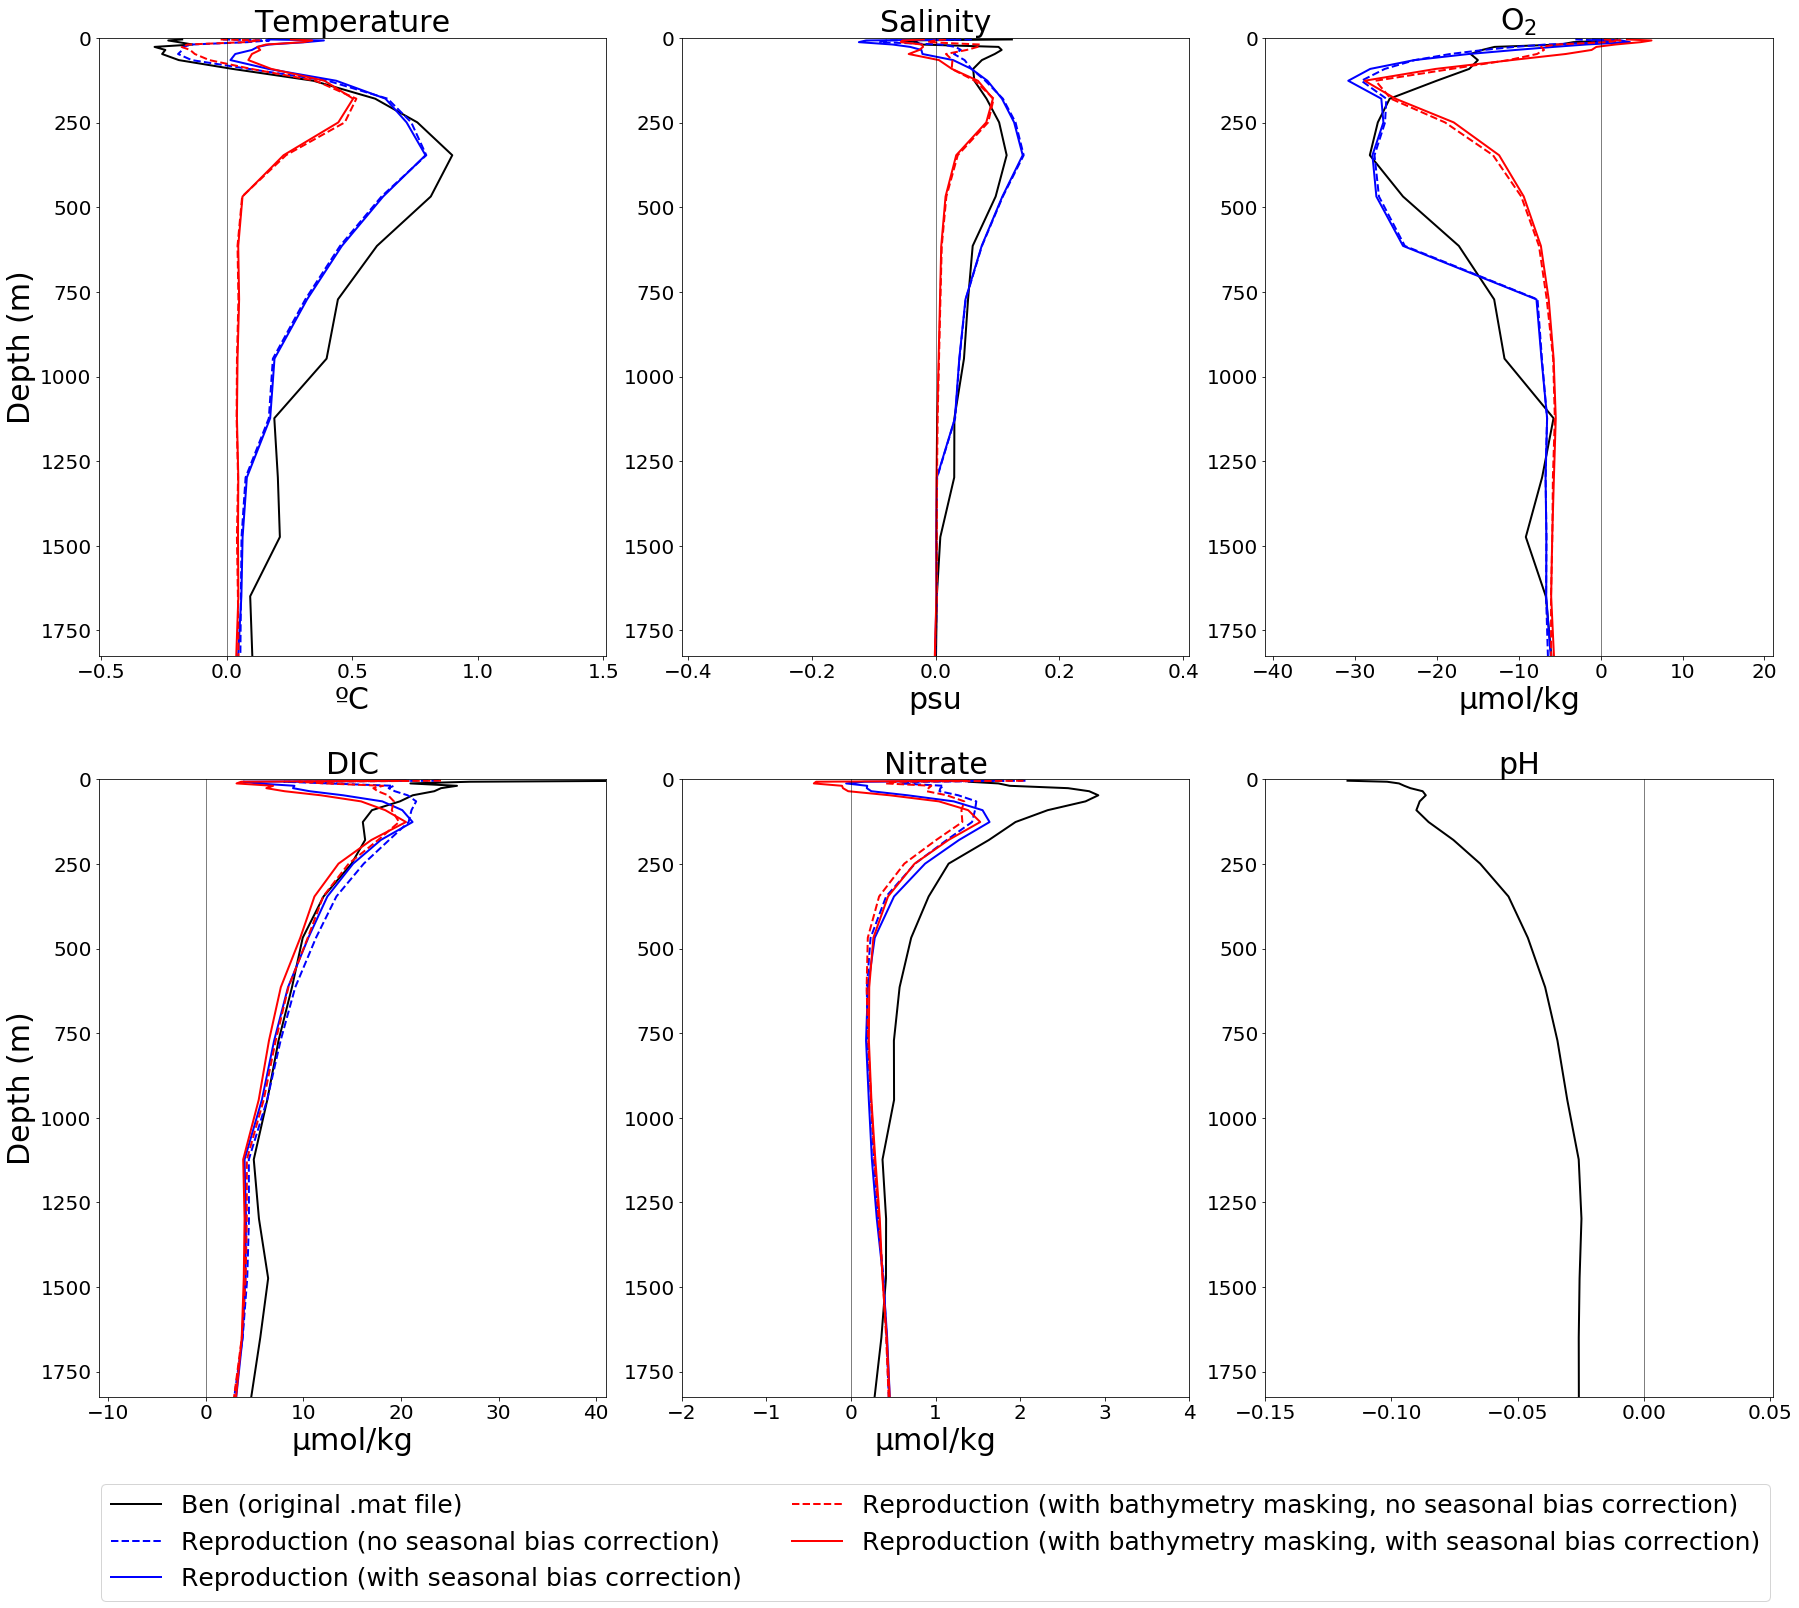

In [103]:
fig = plt.figure(figsize=[30, 25])
gs = gridspec.GridSpec(2,3)
ax, ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[1,0]),plt.subplot(gs[1,1]), plt.subplot(gs[1,2])
gs.update(hspace = 0.2, wspace = 0.15)

ax.plot(Ben_anomaly_Temp_vert60.values, Ben_anomaly_Temp_vert60.depth, 'k', linewidth = 2, label = 'Ben (original .mat file)')
ax.plot(Ruth_anomaly_Temp_vert60.values, Ruth_anomaly_Temp_vert60.depth, 'b--', linewidth = 2, label = 'Reproduction (no seasonal bias correction)')
ax.plot(Ruth_anomaly_Temp_vert60_BC.values, Ruth_anomaly_Temp_vert60_BC.depth, 'b', linewidth = 2, label = 'Reproduction (with seasonal bias correction)')
ax.plot(Ruth_anomaly_Temp_vert60_bathy.values, Ruth_anomaly_Temp_vert60_bathy.depth, 'r--', linewidth = 2, label = 'Reproduction (with bathymetry masking, no seasonal bias correction)')
ax.plot(Ruth_anomaly_Temp_vert60_BC_bathy.values, Ruth_anomaly_Temp_vert60_BC_bathy.depth, 'r', linewidth = 2, label = 'Reproduction (with bathymetry masking, with seasonal bias correction)')
ax.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax.set_ylim([1825,0])
ax.set_xlim([-0.51,1.51])
ax.set_title('Temperature', fontsize = 30)
ax.set_ylabel('Depth (m)', fontsize = 30)
ax.set_xlabel('ºC', fontsize = 30)

ax1.plot(Ben_anomaly_Salt_vert60.values, Ben_anomaly_Salt_vert60.depth, 'k', linewidth = 2)
ax1.plot(Ruth_anomaly_Salt_vert60.values, Ruth_anomaly_Salt_vert60.depth, 'b--', linewidth = 2)
ax1.plot(Ruth_anomaly_Salt_vert60_BC.values, Ruth_anomaly_Salt_vert60_BC.depth, 'b', linewidth = 2)
ax1.plot(Ruth_anomaly_Salt_vert60_bathy.values, Ruth_anomaly_Salt_vert60_bathy.depth, 'r--', linewidth = 2)
ax1.plot(Ruth_anomaly_Salt_vert60_BC_bathy.values, Ruth_anomaly_Salt_vert60_BC_bathy.depth, 'r', linewidth = 2)
ax1.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax1.set_ylim([1825,0])
ax1.set_xlim([-0.41,0.41])
ax1.set_xlabel('psu', fontsize = 30)
ax1.set_title('Salinity', fontsize = 30)

ax2.plot(Ben_anomaly_Oxygen_vert60.values, Ben_anomaly_Oxygen_vert60.depth, 'k', linewidth = 2)
ax2.plot(Ruth_anomaly_Oxygen_vert60.values, Ruth_anomaly_Oxygen_vert60.depth, 'b--', linewidth = 2)
ax2.plot(Ruth_anomaly_Oxygen_vert60_BC.values, Ruth_anomaly_Oxygen_vert60_BC.depth, 'b', linewidth = 2)
ax2.plot(Ruth_anomaly_Oxygen_vert60_bathy.values, Ruth_anomaly_Oxygen_vert60_bathy.depth, 'r--', linewidth = 2)
ax2.plot(Ruth_anomaly_Oxygen_vert60_BC_bathy.values, Ruth_anomaly_Oxygen_vert60_BC_bathy.depth, 'r', linewidth = 2)
ax2.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax2.set_ylim([1825,0])
ax2.set_xlim([-41,21])
ax2.set_xlabel('µmol/kg', fontsize = 30)
ax2.set_title('O$_2$', fontsize = 30)

ax3.plot(Ben_anomaly_DIC_vert60.values, Ben_anomaly_DIC_vert60.depth, 'k', linewidth = 2)
ax3.plot(Ruth_anomaly_DIC_vert60.values, Ruth_anomaly_DIC_vert60.depth, 'b--', linewidth = 2)
ax3.plot(Ruth_anomaly_DIC_vert60_BC.values, Ruth_anomaly_DIC_vert60_BC.depth, 'b', linewidth = 2)
ax3.plot(Ruth_anomaly_DIC_vert60_bathy.values, Ruth_anomaly_DIC_vert60_bathy.depth, 'r--', linewidth = 2)
ax3.plot(Ruth_anomaly_DIC_vert60_BC_bathy.values, Ruth_anomaly_DIC_vert60_BC_bathy.depth, 'r', linewidth = 2)
ax3.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax3.set_ylim([1825,0])
ax3.set_xlim([-11,41])
ax3.set_ylabel('Depth (m)', fontsize = 30)
ax3.set_xlabel('µmol/kg', fontsize = 30)
ax3.set_title('DIC', fontsize = 30)

ax4.plot(Ben_anomaly_Nitrate_vert60.values, Ben_anomaly_Nitrate_vert60.depth, 'k', linewidth = 2)
ax4.plot(Ruth_anomaly_Nitrate_vert60.values, Ruth_anomaly_Nitrate_vert60.depth, 'b--', linewidth = 2)
ax4.plot(Ruth_anomaly_Nitrate_vert60_BC.values, Ruth_anomaly_Nitrate_vert60_BC.depth, 'b', linewidth = 2)
ax4.plot(Ruth_anomaly_Nitrate_vert60_bathy.values, Ruth_anomaly_Nitrate_vert60_bathy.depth, 'r--', linewidth = 2)
ax4.plot(Ruth_anomaly_Nitrate_vert60_BC_bathy.values, Ruth_anomaly_Nitrate_vert60_BC_bathy.depth, 'r', linewidth = 2)
ax4.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax4.set_ylim([1825,0])
ax4.set_xlim([-2,4])
ax4.set_xlabel('µmol/kg', fontsize = 30)
ax4.set_title('Nitrate', fontsize = 30)

ax5.plot(Ben_anomaly_pH_vert60.values, Ben_anomaly_pH_vert60.depth, 'k', linewidth = 2)
ax5.plot([0,0], [0,2000], 'k', linewidth = 1, alpha = 0.5)
ax5.set_ylim([1825,0])
ax5.set_xlim([-0.15,0.051])
ax5.set_title('pH', fontsize = 30)

ax.legend(loc='lower center', bbox_to_anchor=(1.65, -1.55),ncol=2, fontsize = 25)

figurepath = 'SF7_reproduction.png'
plt.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format='png',transparent=False, bbox_inches='tight', pad_inches=0.1,frameon=None)

plt.show()